In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print(sum(np.sum(pd.isnull(training), axis = 0).tolist()))
# There are no NULL values in training dataset
print(sum(np.sum(pd.isnull(test), axis = 0).tolist()))
# There are no NULL values in test set

0
0


In [5]:
training = training.iloc[:, 1:]
test = test.iloc[:, 1:]

We want to recover from the data loss of the AGA frequency on test samples. Train a regressor which can predict the value of the AGA feature given the remaining ones. Compare different regression algorithms for this task. Since AGA features are missing in test samples, use only the training data for this step and make use of robust evaluation techniques to compare algorithms.

In [6]:
print("Kingdom values: ", np.unique(training["Kingdom"]))
print("DNA type values: ", np.unique(training["DNAtype"]))

Kingdom values:  ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
DNA type values:  [ 0  1  2  3  4  5  6  7  9 11 12]


C:\Users\comin\AppData\Local\Temp\ipykernel_16468\1832260200.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\comin\AppData\Local\Temp\ipykernel_16468\1832260200.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


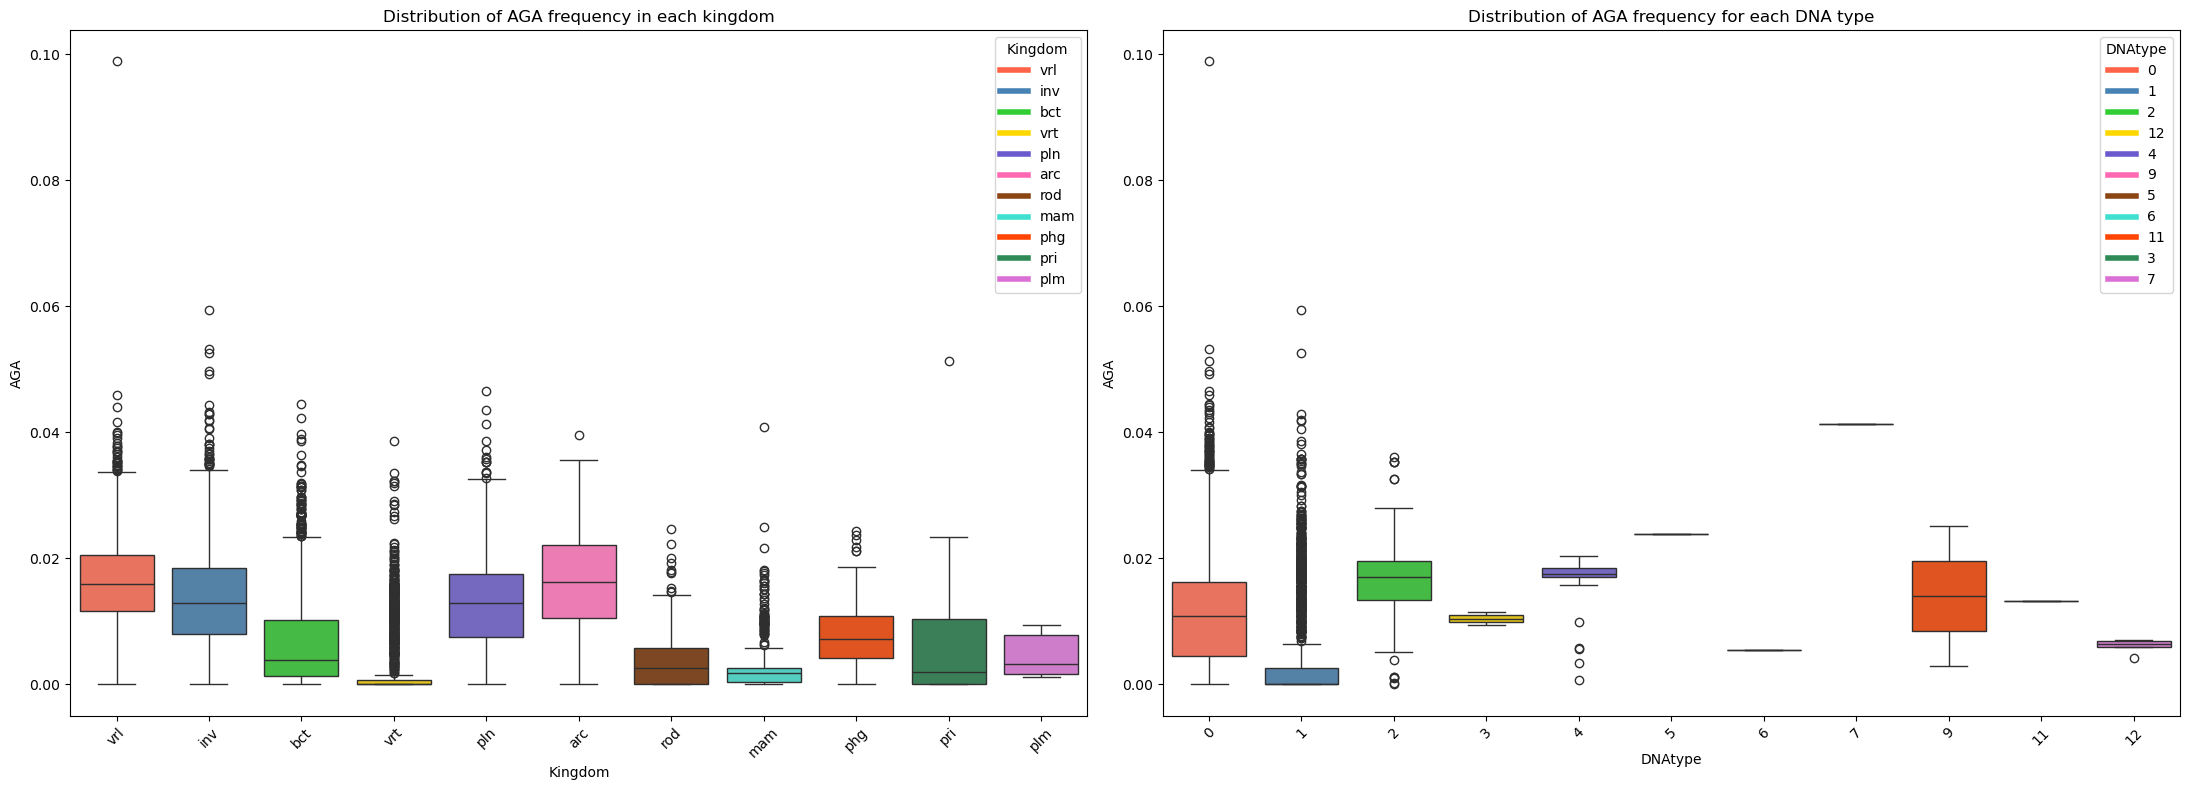

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD',
                 '#FF69B4', '#8B4513', '#40E0D0', '#FF4500', '#2E8B57', '#DA70D6']

sns.boxplot(ax=axes[0], x='Kingdom', y='AGA', data=training, palette=custom_colors, hue = 'Kingdom')
axes[0].set_title('Distribution of AGA frequency in each kingdom')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(ax=axes[1], x='DNAtype', y='AGA', data=training, palette=custom_colors, hue = 'DNAtype')
axes[1].set_title('Distribution of AGA frequency for each DNA type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

kingdom_legend = [plt.Line2D([0], [0], color=custom_colors[i], lw=4) for i in range(len(training['Kingdom'].unique()))]
axes[0].legend(kingdom_legend, training['Kingdom'].unique(), title='Kingdom', loc='upper right')

dnatype_legend = [plt.Line2D([0], [0], color=custom_colors[i], lw=4) for i in range(len(training['DNAtype'].unique()))]
axes[1].legend(dnatype_legend, training['DNAtype'].unique(), title='DNAtype', loc='upper right')

plt.tight_layout()
plt.show()


#### Function to one-hot encode categorical variables:

In [38]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values) #when you use an array to index another array in NumPy, it selects rows from the indexed array based on the values in the index array. e[a] selects rows from the identity matrix e based on the values in array a
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

#### One-hot encoding of both the 'Kingdom' and 'DNAtype' features (on both training and test datasets):

In [39]:
training_ohe = onehot_feature(training, 'Kingdom')
training_ohe = onehot_feature(training_ohe, 'DNAtype')

test_ohe = onehot_feature(test, 'Kingdom')
test_ohe = onehot_feature(test_ohe, 'DNAtype')

training_ohe.head()

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,DNAtype_1,DNAtype_11,DNAtype_12,DNAtype_2,DNAtype_3,DNAtype_4,DNAtype_5,DNAtype_6,DNAtype_7,DNAtype_9
0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation between AGA and each codon and then between each pair of codon

In [8]:
# First let's check if we can use Pearson correlation:

#for col in training.columns[5:]:
#    plt.hist(training.loc[:, col], bins = 10)
#    plt.show()
# We can't because they don't follow a gaussian distribution, so we use rank correlation methods like Spearman:

from scipy import stats
print("Codons that have a Spearman correlation >= 0.5 (in absolute terms) with AGA:")
for col in training.columns[5:]:
    if col != 'AGA':
        res = stats.spearmanr(training.loc[:, col], training.loc[:, 'AGA'])
        if abs(res.statistic) >= 0.5:
            print("{}: {} -- p-value = {}".format(col, res.statistic, res.pvalue))

# Now we look at the Spearman correlation between all codons to understand if there's some redundancy:

print("\nPairs of codons with a Spearman correlation >= 0.8 (in absolute terms) NOT considering AGA")
for codon1 in training.columns[5:]:
    for codon2 in training.columns[5:]:
        if codon1 != codon2 and codon1 != 'AGA' and codon2 != 'AGA':
            res = stats.spearmanr( training.loc[:, codon1]    ,  training.loc[:, codon2]    )
        if abs(res.statistic) >= 0.8:
            print("Spearman correlation between {} and {}: {} -- p-value = {}".format(codon1, codon2, res.statistic,
                                                                                     res.pvalue))

Codons that have a Spearman correlation >= 0.5 (in absolute terms) with AGA:
UUG: 0.517733529126989 -- p-value = 0.0
AUC: -0.6633343136412367 -- p-value = 0.0
GCC: -0.7147492089184697 -- p-value = 0.0
CCC: -0.5197634685183508 -- p-value = 0.0
GGC: -0.5852023884920887 -- p-value = 0.0
UCU: 0.5009233407342024 -- p-value = 0.0
AGU: 0.694694113172632 -- p-value = 0.0
UAU: 0.561316082441995 -- p-value = 0.0
AAU: 0.6609476920961472 -- p-value = 0.0
UGU: 0.669400904393223 -- p-value = 0.0
CAU: 0.5266827529444139 -- p-value = 0.0
CAC: -0.5115707636164963 -- p-value = 0.0
AAA: 0.5339363538522637 -- p-value = 0.0
AGG: 0.632327477358485 -- p-value = 0.0
GAU: 0.6161749105450396 -- p-value = 0.0
GAA: 0.5428476518370057 -- p-value = 0.0

Pairs of codons with a Spearman correlation >= 0.8 (in absolute terms) NOT considering AGA
Spearman correlation between UUA and AUU: 0.8367679640170536 -- p-value = 0.0
Spearman correlation between AUU and UUA: 0.8367679640170534 -- p-value = 0.0
Spearman correlatio

#### All functions needed later on:

In [34]:
from scipy.stats import t, f

def rss(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

def show_stats(X, y, betas, names, alpha=None):
    
    from statsmodels.stats.multitest import multipletests
    
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)
    
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    df["FDR"] = pvals_corrected
    if alpha:
        rejectH0 = pvals_corrected < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    return df
 
def Ftest_restricted(data, y, subset_features):
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

#### Multivariate linear regression models to understand which codon are useless for predicting AGA frequency
#### Features considered: Codons
#### APPLICA CORREZIONE PER TEST MULTIPLI

In [35]:
from sklearn.linear_model import LinearRegression

X1 = training.iloc[:, 5:].drop("AGA", axis = 1)
y = training.loc[:, "AGA"]

X1_all_features = [col_name for col_name in X1.columns.tolist()]

linear_model1 = LinearRegression(fit_intercept=True)
linear_model1 = linear_model1.fit(X1, y)

betas = np.array([linear_model1.intercept_, *linear_model1.coef_]).reshape(-1, 1) 
final_stats = show_stats(X1.to_numpy(), y.to_numpy(), betas, ['Intercept', *X1_all_features], alpha=0.001)
print(final_stats)
print("\nNOT SIGNIFICANT CODONS:\n ", final_stats[final_stats.loc[:, 'reject H0']==False])


         Name  Coefficients  Standard Errors        t-stat  p-value  FDR  \
0   Intercept      0.999938         0.000082  12248.651521      0.0  0.0   
1         UUU     -0.999900         0.000088 -11419.511160      0.0  0.0   
2         UUC     -0.999959         0.000101  -9905.781604      0.0  0.0   
3         UUA     -0.999960         0.000096 -10412.822448      0.0  0.0   
4         UUG     -0.999897         0.000103  -9710.379087      0.0  0.0   
..        ...           ...              ...           ...      ...  ...   
59        GAA     -0.999955         0.000103  -9738.646816      0.0  0.0   
60        GAG     -0.999950         0.000100 -10007.550693      0.0  0.0   
61        UAA     -0.999893         0.000088 -11412.835860      0.0  0.0   
62        UAG     -0.999394         0.000435  -2295.279831      0.0  0.0   
63        UGA     -1.000029         0.000133  -7535.083484      0.0  0.0   

    reject H0  
0        True  
1        True  
2        True  
3        True  
4      

#### Multivariate linear regression models to understand which codon are useless for predicting AGA frequency
#### Features considered: Codons, Kingdom and DNAtype

#### Se consideriamo tutti i livelli della dummy variable "DNAtype" la funzione dà NaN per gli SE dei coefficienti --> può aver senso rimuovere i livelli della variabile che hanno troppe poche osservazioni (1 sola) dato che questo porta sicuramente ad una stima non precisa del coefficiente

In [41]:
X2 = training_ohe.drop(["AGA", "SpeciesName", "SpeciesID", "Ncodons", "DNAtype_11"], axis = 1)
y = training_ohe.loc[:, "AGA"]

X2_all_features = X2.columns.tolist()

linear_model2 = LinearRegression(fit_intercept=True)
linear_model2 = linear_model2.fit(X2, y)

betas = np.array([linear_model2.intercept_, *linear_model2.coef_]).reshape(-1, 1) 
final_stats = show_stats(X2.to_numpy(), y.to_numpy(), betas, ['Intercept', *X2_all_features], alpha=0.001)


print(final_stats)
print("\nNOT SIGNIFICANT FEATURES: \n", final_stats[final_stats.loc[:, 'reject H0']==False])

         Name  Coefficients  Standard Errors        t-stat   p-value  \
0   Intercept      0.999936        75.653152      0.013217  0.989455   
1         UUU     -0.999914         0.000091 -11002.918357  0.000000   
2         UUC     -0.999983         0.000105  -9561.039824  0.000000   
3         UUA     -0.999972         0.000101  -9931.372048  0.000000   
4         UUG     -0.999911         0.000105  -9492.038515  0.000000   
..        ...           ...              ...           ...       ...   
80  DNAtype_4      0.000006         0.000039      0.155761  0.876224   
81  DNAtype_5      0.000028         0.000054      0.522845  0.601093   
82  DNAtype_6      0.000048         0.000054      0.878556  0.379662   
83  DNAtype_7      0.000055         0.000055      1.002649  0.316054   
84  DNAtype_9     -0.000031         0.000047     -0.666865  0.504874   

         FDR  reject H0  
0   1.000000      False  
1   0.000000       True  
2   0.000000       True  
3   0.000000       True  
4   0

In [12]:
print(np.sum(training_ohe.loc[:, "DNAtype_1":], axis = 0), '\n')

print(np.sum(training_ohe.loc[:, "Kingdom_arc":"Kingdom_vrt"], axis = 0))

DNAtype_1     2320.0
DNAtype_11       1.0
DNAtype_12       5.0
DNAtype_2      658.0
DNAtype_3        2.0
DNAtype_4       24.0
DNAtype_5        1.0
DNAtype_6        1.0
DNAtype_7        1.0
DNAtype_9        2.0
dtype: float64 

Kingdom_arc     101.0
Kingdom_bct    2336.0
Kingdom_inv    1076.0
Kingdom_mam     458.0
Kingdom_phg     176.0
Kingdom_plm      14.0
Kingdom_pln    2018.0
Kingdom_pri     144.0
Kingdom_rod     172.0
Kingdom_vrl    2265.0
Kingdom_vrt    1662.0
dtype: float64


#### Performance of the model with only the codons


In [13]:
from sklearn.metrics import r2_score, mean_squared_error

y_predict = linear_model1.predict(X1)
print("Train R2 score ", r2_score(y, y_predict))
print("Train MSE score ", mean_squared_error(y, y_predict))

Train R2 score  0.9999803188956894
Train MSE score  1.4547727981251517e-09


#### Check that 'DNAtype' and 'Kingdom' features are actually useless to predict AGA frequency
By looking at the p-value, we can exclude those features.

In [14]:
features_to_exclude = X2.loc[:, "Kingdom_arc":].columns.tolist()

p_value, F = Ftest_restricted(X2, y, features_to_exclude)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < 0.001:
    print("Reject H0: There is evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")


p-value = 0.6378232098784188
F-stat = 0.8655025713324493
Do not Reject H0: There is NO evidence to say that at least one of the S features is useful


### Plots for Goodness of Fit

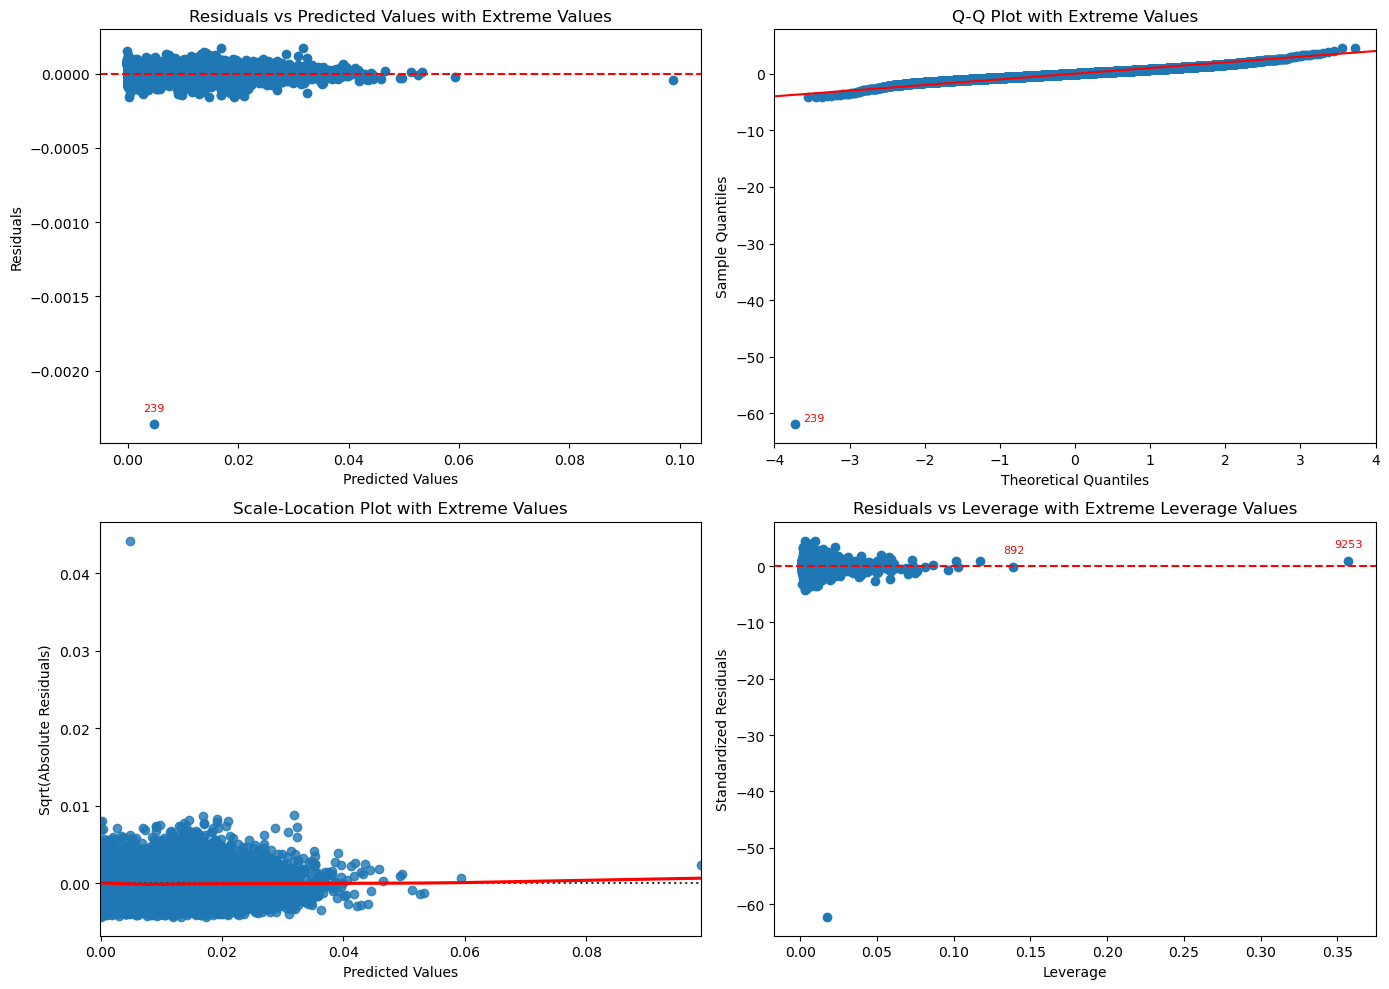

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error

# Calcolo dei residui
residuals = y - y_predict

# Creazione del modello di regressione con statsmodels per ottenere leverage e standardized residuals
X_sm = sm.add_constant(X1)  # Aggiunge un termine di intercetta
model_sm = sm.OLS(y, X_sm).fit()

# Calcolo di leverage e standardized residuals
influence = OLSInfluence(model_sm)
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Creazione della figura e dei subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Grafico dei residui con valori estremi
axs[0, 0].scatter(y_predict, residuals)
axs[0, 0].axhline(y=0, color='r', linestyle='--')

threshold_residuals = 5 * np.std(residuals)
extreme_residuals_indices = np.where(np.abs(residuals) > threshold_residuals)[0]

for idx in extreme_residuals_indices:
    axs[0, 0].annotate(str(idx), (y_predict[idx], residuals[idx]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].set_title('Residuals vs Predicted Values with Extreme Values')

# 2. Grafico Q-Q con valori estremi
sm.qqplot(residuals, line='45', ax=axs[0, 1], fit=True)

for idx in extreme_residuals_indices:
    axs[0, 1].annotate(str(idx), (sm.ProbPlot(residuals).theoretical_quantiles[idx], residuals[idx]), textcoords="offset points", xytext=(-80, -250), ha='center', fontsize=8, color='red')

axs[0, 1].set_xlim([-4, 4])
axs[0, 1].set_title('Q-Q Plot with Extreme Values')

# 3. Grafico scale-location con valori estremi
threshold_residuals = 6.5 * np.std(np.sqrt(np.abs(residuals)))
extreme_residuals_indices = np.where(np.sqrt(np.abs(residuals)) > 0.04)[0]

sns.residplot(x=y_predict, y=np.sqrt(np.abs(residuals)), lowess=True, line_kws={'color': 'red'}, ax=axs[1, 0])

for idx in extreme_residuals_indices:
    axs[1, 0].annotate(str(idx), (y_predict[idx], np.sqrt(np.abs(residuals))[idx]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=20, color='red')

axs[1, 0].set_xlabel('Predicted Values')
axs[1, 0].set_ylabel('Sqrt(Absolute Residuals)')
axs[1, 0].set_title('Scale-Location Plot with Extreme Values')

# 4. Grafico residui vs leverage con valori estremi
#threshold_residuals = 5 * np.std(residuals)
#extreme_residuals_indices = np.where(np.abs(residuals) > threshold_residuals)[0]

axs[1, 1].scatter(leverage, standardized_residuals)
axs[1, 1].axhline(y=0, color='r', linestyle='--')

threshold_leverage = 20 * np.mean(leverage)
extreme_leverage_indices = np.where(leverage > threshold_leverage)[0]

for idx in extreme_leverage_indices:
    axs[1, 1].annotate(str(idx), (leverage[idx], standardized_residuals[idx]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

axs[1, 1].set_xlabel('Leverage')
axs[1, 1].set_ylabel('Standardized Residuals')
axs[1, 1].set_title('Residuals vs Leverage with Extreme Leverage Values')

# Miglioramento del layout
plt.tight_layout()
plt.show()


### Ridge vs Lasso
#### In theory, Lasso performs better when we expect only few features to be significant. In this case we expect a lot of features to be useful (almost all the codons) so probably Ridge is better (try both but with this premise)
#### Don't forget about Elastic Net

#### Ridge, with CV

In [16]:
from sklearn.linear_model import RidgeCV

X = training.iloc[:, 5:].drop("AGA", axis = 1)
y = training.loc[:, "AGA"]

ridge_linear_model = RidgeCV(alphas=[1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,
                                    1e-3, 1e-2, 1e-1, 1], fit_intercept = True).fit(X, y)
ridge_linear_model.score(X, y)
ridge_linear_model.alpha_ # Regolarizza poco

ridge_linear_model.coef_

array([-0.99989797, -0.99996219, -0.99995972, -0.99989169, -0.99982781,
       -0.99988873, -1.00016744, -0.9999523 , -0.99984709, -0.99999328,
       -0.99983637, -1.00001541, -0.9999014 , -1.00001455, -0.99985913,
       -0.99985732, -0.99986552, -0.9998667 , -0.99997477, -1.00010244,
       -1.00001627, -0.99985158, -1.00006516, -0.99980884, -0.9999665 ,
       -0.99992212, -0.99993883, -0.99993559, -0.99983292, -1.00069803,
       -0.9998157 , -0.99987106, -0.99990506, -0.99982157, -0.99992948,
       -0.99981355, -0.99992822, -0.99987199, -0.99989004, -1.00015756,
       -0.99983644, -0.99984315, -0.99996281, -0.99992119, -0.99990003,
       -0.9997493 , -1.00020639, -0.99972808, -1.0001158 , -0.99990369,
       -0.99995385, -1.00012177, -0.99990176, -0.9997737 , -1.00004166,
       -0.99979269, -0.99997852, -0.99990102, -0.99995236, -0.99994566,
       -0.99989263, -0.99939341, -1.00003447])

In [17]:
y_predict = ridge_linear_model.predict(X)
print("Train R2 score ", r2_score(y, y_predict))
print("Train MSE score ", mean_squared_error(y, y_predict))

Train R2 score  0.9999803050407857
Train MSE score  1.4557969142875978e-09


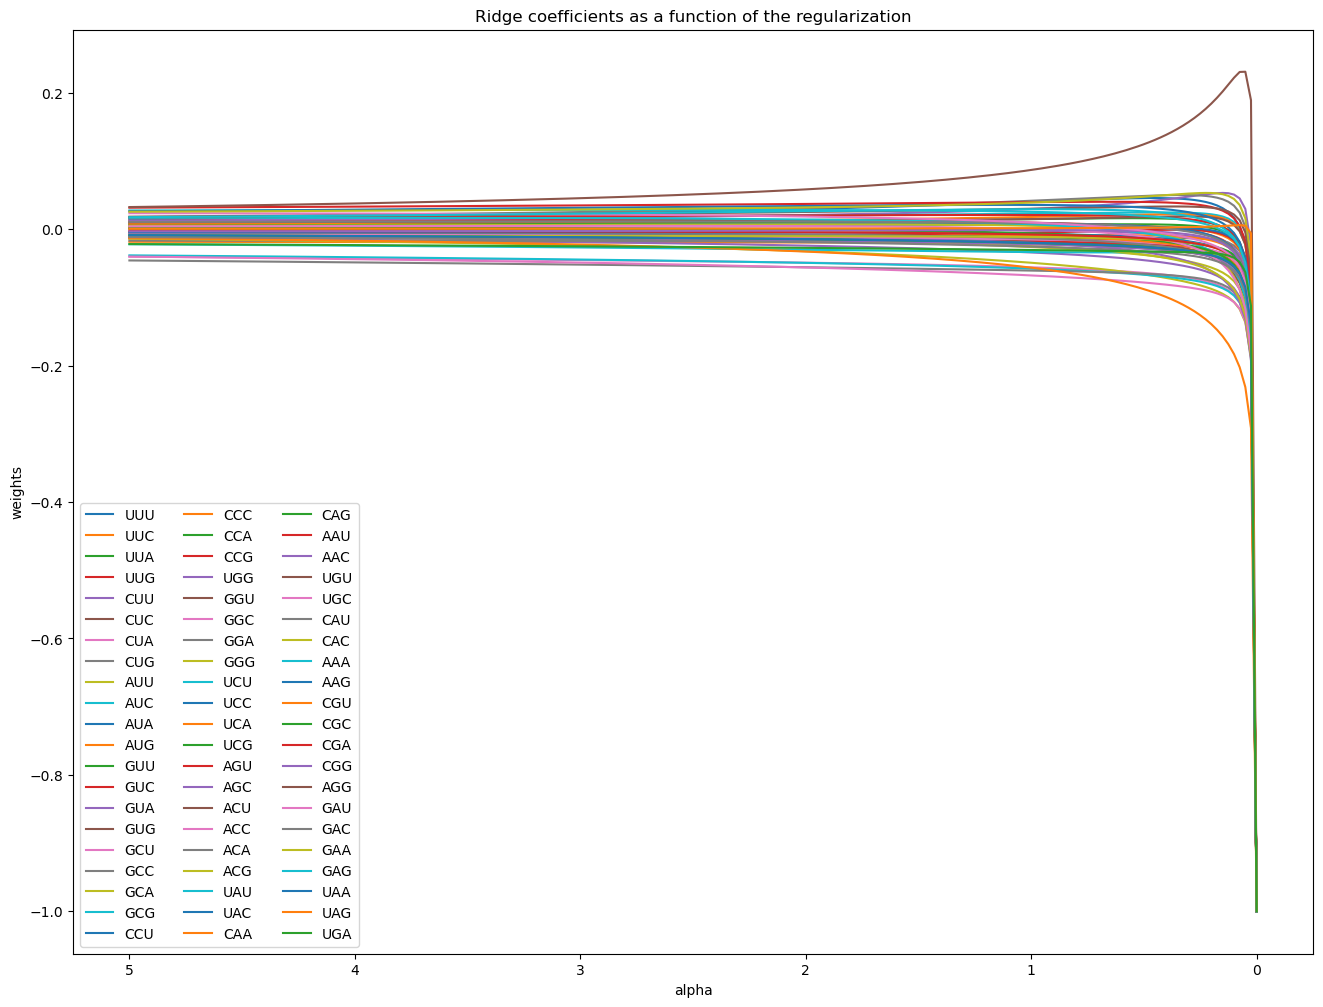

In [18]:
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.linspace(0, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(16,12))

ax = plt.gca()

# Plot dei coefficienti con nomi delle variabili
for i in range(len(X.columns)):
    ax.plot(alphas, [coef[i] for coef in coefs], label=X.columns[i])

#ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

# Aggiunta della legenda
plt.legend(loc='lower left', ncol = 3)
plt.show()


#### Lasso, with CV

In [19]:
from sklearn.linear_model import LassoCV
X = training.iloc[:, 5:].drop("AGA", axis = 1)
y = training.loc[:, "AGA"]

lasso_linear_model = LassoCV(cv=10, random_state=0, max_iter=10000, 
                             alphas = np.linspace(0.0000000000001, 0.0001, 200)).fit(X, y)
lasso_linear_model.score(X, y)

for idx,coef in enumerate(lasso_linear_model.coef_):
    if abs(coef) != 0:
        print("Coefficient of {}: {}".format(X.columns[idx], coef))
    else:
        print("Coefficient {} was removed".format(X.columns[idx]))

print("Alphas used: ", lasso_linear_model.alphas_)
print("Alpha choosen: ", lasso_linear_model.alpha_)
print("MSE path: ", lasso_linear_model.mse_path_)
# Quindi come valori migliori per i coefficienti non trova -0.9999 solo perché parte da un alpha che non
# è molto piccolo, quindi si obbliga a regolarizzare già un po'
# Infatti provando diversi alpha, sceglie sempre e comunque il più piccolo --> non regolarizza perché il top
# sono i coefficienti originali

Coefficient of UUU: -0.9859101797072379
Coefficient of UUC: -0.9862611249608876
Coefficient of UUA: -0.985262292325044
Coefficient of UUG: -0.985254308996446
Coefficient of CUU: -0.9865474455903147
Coefficient of CUC: -0.9859346149551099
Coefficient of CUA: -0.9867243587742204
Coefficient of CUG: -0.9853736875119462
Coefficient of AUU: -0.9862675782171917
Coefficient of AUC: -0.9866806349978599
Coefficient of AUA: -0.9847469197956227
Coefficient of AUG: -0.9859086120781642
Coefficient of GUU: -0.9858945979186559
Coefficient of GUC: -0.9860691488528447
Coefficient of GUA: -0.9850778103022814
Coefficient of GUG: -0.9868360171077394
Coefficient of GCU: -0.9857867234519253
Coefficient of GCC: -0.9866995754709847
Coefficient of GCA: -0.9866104831871763
Coefficient of GCG: -0.9856285001609458
Coefficient of CCU: -0.9860449310527384
Coefficient of CCC: -0.9854052607380831
Coefficient of CCA: -0.9853677249899238
Coefficient of CCG: -0.9859005927805161
Coefficient of UGG: -0.9845473536281897
Co

In [20]:
y_predict = lasso_linear_model.predict(X)
print("Train R2 score ", r2_score(y, y_predict))
print("Train MSE score ", mean_squared_error(y, y_predict))

Train R2 score  0.9999227475733042
Train MSE score  5.710285722428787e-09


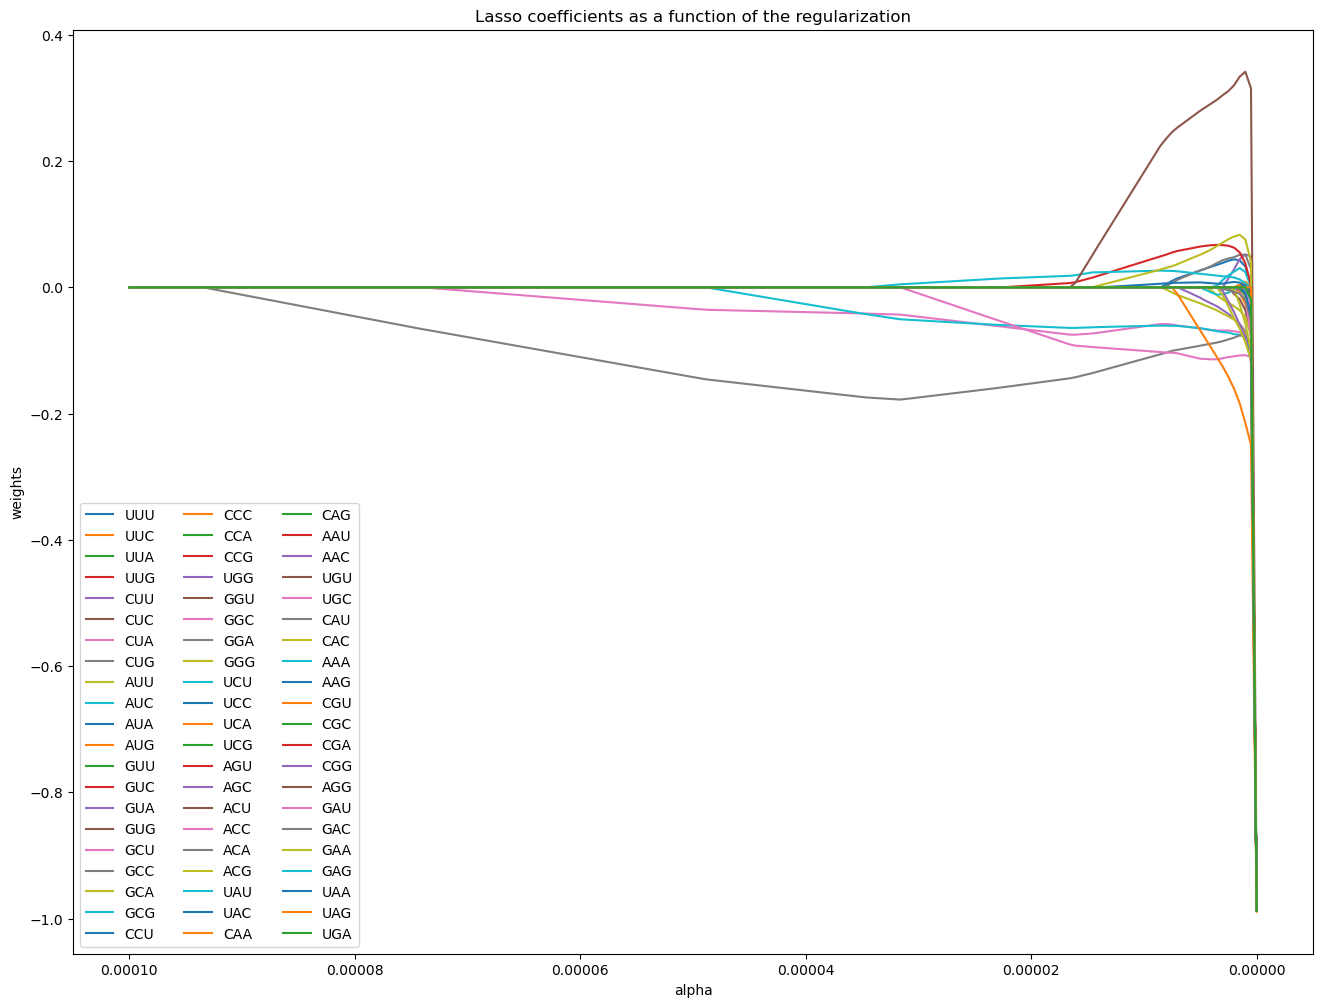

In [21]:
from sklearn.linear_model import Lasso

n_alphas = 200
alphas = np.linspace(0.0000000000001, 0.0001, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(16,12))

ax = plt.gca()

# Plot dei coefficienti con nomi delle variabili
for i in range(len(X.columns)):
    ax.plot(alphas, [coef[i] for coef in coefs], label=X.columns[i])

#ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")

# Aggiunta della legenda
plt.legend(loc='lower left', ncol = 3)
plt.show()


### Forward feature selection
### because there are too many variables to use the Best Subset feature selection

In [22]:
def get_evaluator(scorer): 
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

def estimate_sigma(Xtrain_pd, ytrain):
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    return scorer

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))

In [23]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1] # Number of features
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []  # <------ !! We keep track of selected features !!
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2.
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Given the previous Mk model, test remaining
        # features and select the one providing the best
        # performance increment
        # ===============================================
        remaining_features = Xtrain_pd.columns.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate in (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        #!!! Update selected feature
        # ==========================
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score_test = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score_test)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

............
Best model (M0) with 1 features: ['GCC']
M0 subset score (3.): 0.4086362316528077
............
Best model (M1) with 2 features: ['GCC', 'AGG']
M1 subset score (3.): 0.55108801884796
............
Best model (M2) with 3 features: ['GCC', 'AGG', 'AAU']
M2 subset score (3.): 0.6075515425817029
............
Best model (M3) with 4 features: ['GCC', 'AGG', 'AAU', 'GAA']
M3 subset score (3.): 0.6296723615941588
............
Best model (M4) with 5 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU']
M4 subset score (3.): 0.6408028751560824
............
Best model (M5) with 6 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC']
M5 subset score (3.): 0.6583101764204625
............
Best model (M6) with 7 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA']
M6 subset score (3.): 0.6665483448161754
............
Best model (M7) with 8 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA']
M7 subset score (3.): 0.6758322135433735
............
Best model (M8) with 9 features: 

............
Best model (M37) with 38 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA', 'AUU', 'ACG', 'AGC', 'CUU', 'GGG', 'GGC', 'CUA', 'AUA', 'UGG', 'UAC', 'UGC', 'UCA', 'GUG', 'UAU', 'ACA', 'UUC', 'CAA', 'GAU', 'CCG', 'GAC', 'CCC', 'GGU', 'AAC', 'CUC', 'CGC', 'UAA', 'GUU', 'UUU', 'ACC', 'GCU']
M37 subset score (3.): 0.7320298493824536
............
Best model (M38) with 39 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA', 'AUU', 'ACG', 'AGC', 'CUU', 'GGG', 'GGC', 'CUA', 'AUA', 'UGG', 'UAC', 'UGC', 'UCA', 'GUG', 'UAU', 'ACA', 'UUC', 'CAA', 'GAU', 'CCG', 'GAC', 'CCC', 'GGU', 'AAC', 'CUC', 'CGC', 'UAA', 'GUU', 'UUU', 'ACC', 'GCU', 'CAG']
M38 subset score (3.): 0.734481204159491
............
Best model (M39) with 40 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA', 'AUU', 'ACG', 'AGC', 'CUU', 'GGG', 'GGC', 'CUA', 'AUA', 'UGG', 'UAC', 'UGC', 'UCA', 'GUG', 'UAU', 'ACA', 'UUC', 'CAA', 'GAU', 'CCG', 'GAC', 'CCC', 'GGU', 'AAC', 'CUC', 'CGC', 

............
Best model (M57) with 58 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA', 'AUU', 'ACG', 'AGC', 'CUU', 'GGG', 'GGC', 'CUA', 'AUA', 'UGG', 'UAC', 'UGC', 'UCA', 'GUG', 'UAU', 'ACA', 'UUC', 'CAA', 'GAU', 'CCG', 'GAC', 'CCC', 'GGU', 'AAC', 'CUC', 'CGC', 'UAA', 'GUU', 'UUU', 'ACC', 'GCU', 'CAG', 'CAU', 'GAG', 'UUG', 'CAC', 'UUA', 'AAG', 'CGG', 'CCU', 'CUG', 'UCG', 'AAA', 'CCA', 'ACU', 'GUC', 'GUA', 'UCU', 'AUG', 'UCC', 'GCG']
M57 subset score (3.): 0.8013350839753816
............
Best model (M58) with 59 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'GGA', 'AUU', 'ACG', 'AGC', 'CUU', 'GGG', 'GGC', 'CUA', 'AUA', 'UGG', 'UAC', 'UGC', 'UCA', 'GUG', 'UAU', 'ACA', 'UUC', 'CAA', 'GAU', 'CCG', 'GAC', 'CCC', 'GGU', 'AAC', 'CUC', 'CGC', 'UAA', 'GUU', 'UUU', 'ACC', 'GCU', 'CAG', 'CAU', 'GAG', 'UUG', 'CAC', 'UUA', 'AAG', 'CGG', 'CCU', 'CUG', 'UCG', 'AAA', 'CCA', 'ACU', 'GUC', 'GUA', 'UCU', 'AUG', 'UCC', 'GCG', 'AGU']
M58 subset score (3.): 0.8191286637672119

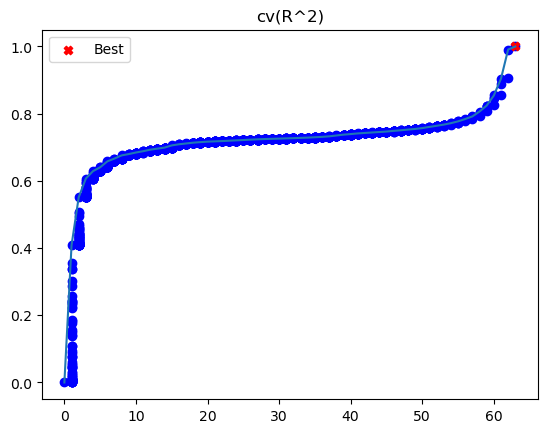

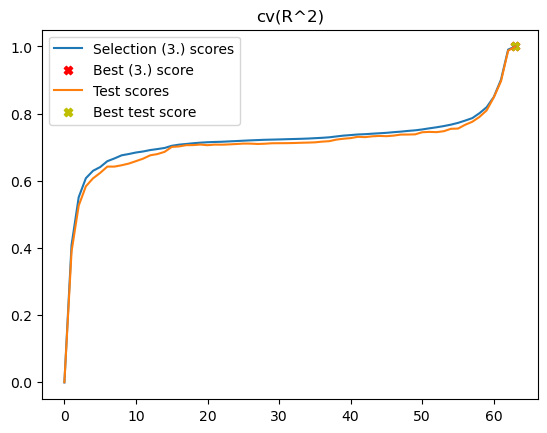

In [25]:
X_train_pd, X_test_pd, y_train, y_test = train_test_split(training.iloc[:, 5:].drop("AGA", axis = 1), 
                                                          training.loc[:, "AGA"], 
                                                          test_size=0.3, random_state=12)

sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  # Use either 5-fold CV or (1-fold cross) validation to 
                  # estimate the test R^2 error at step (3.) of the algorithm
                  get_cv_evaluator(make_scorer(r2_score), cv=10), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

#### Notice that the first selected features are the codons which correlate (Spearman correlation) the most with the response codon AGA

## Now we try to fit a polinomial, choosing the best degree using CV

### Su gradi maggiori all'1 dà warning --> probabilmente diventano troppe variabili da stimare con il numero di dati che abbiamo

## Si può provare su un subset delle features, quelle 10 che davano già R^2 di 0.7 nel lineare

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X1 = training.loc[:, ['GCC', 'AGG', 'AAU', 'GAA'] ]
y = training.loc[:, "AGA"]

model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

parameters = {'poly__degree': list(range(1,5,1))}

r2_scorer = make_scorer(r2_score, greater_is_better=True)
cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=3, refit=True)
cv.fit(X1, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring=make_scorer(r2_score))

In [35]:
print("Best trained estimator:\n", cv.best_estimator_)

print("Parameters of the best trained estimator:\n", cv.best_params_)

print("Best CV score, i.e. mean of the scores on each fold:\n", cv.best_score_)

Best trained estimator:
 Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
Parameters of the best trained estimator:
 {'poly__degree': 2}
Best CV score, i.e. mean of the scores on each fold:
 0.6729736611226272


### PCA applied to regression

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X1)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.69610548 0.15511685 0.10137954]
[2.35211292 1.11032504 0.89762678]


In [3]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
training = training.iloc[:, 1:]
test = test.iloc[:, 1:]

In [4]:
from sklearn.decomposition import PCA

# Define PCA with 3 components, this will transform 
pca = PCA(n_components=3)

X_prj = pca.fit_transform(training.iloc[:, 5:])

X_prj.shape
# Why not normalize to mean = 0?
# For visualization we don't need to do it.
# I can try to normalize and see what happen.

(10422, 3)

Shape of X before passing to plot3d: (10422, 63)
Number of labels: 10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
Numeric labels: [9 2 1 ... 1 6 6]


<IPython.core.display.Javascript object>


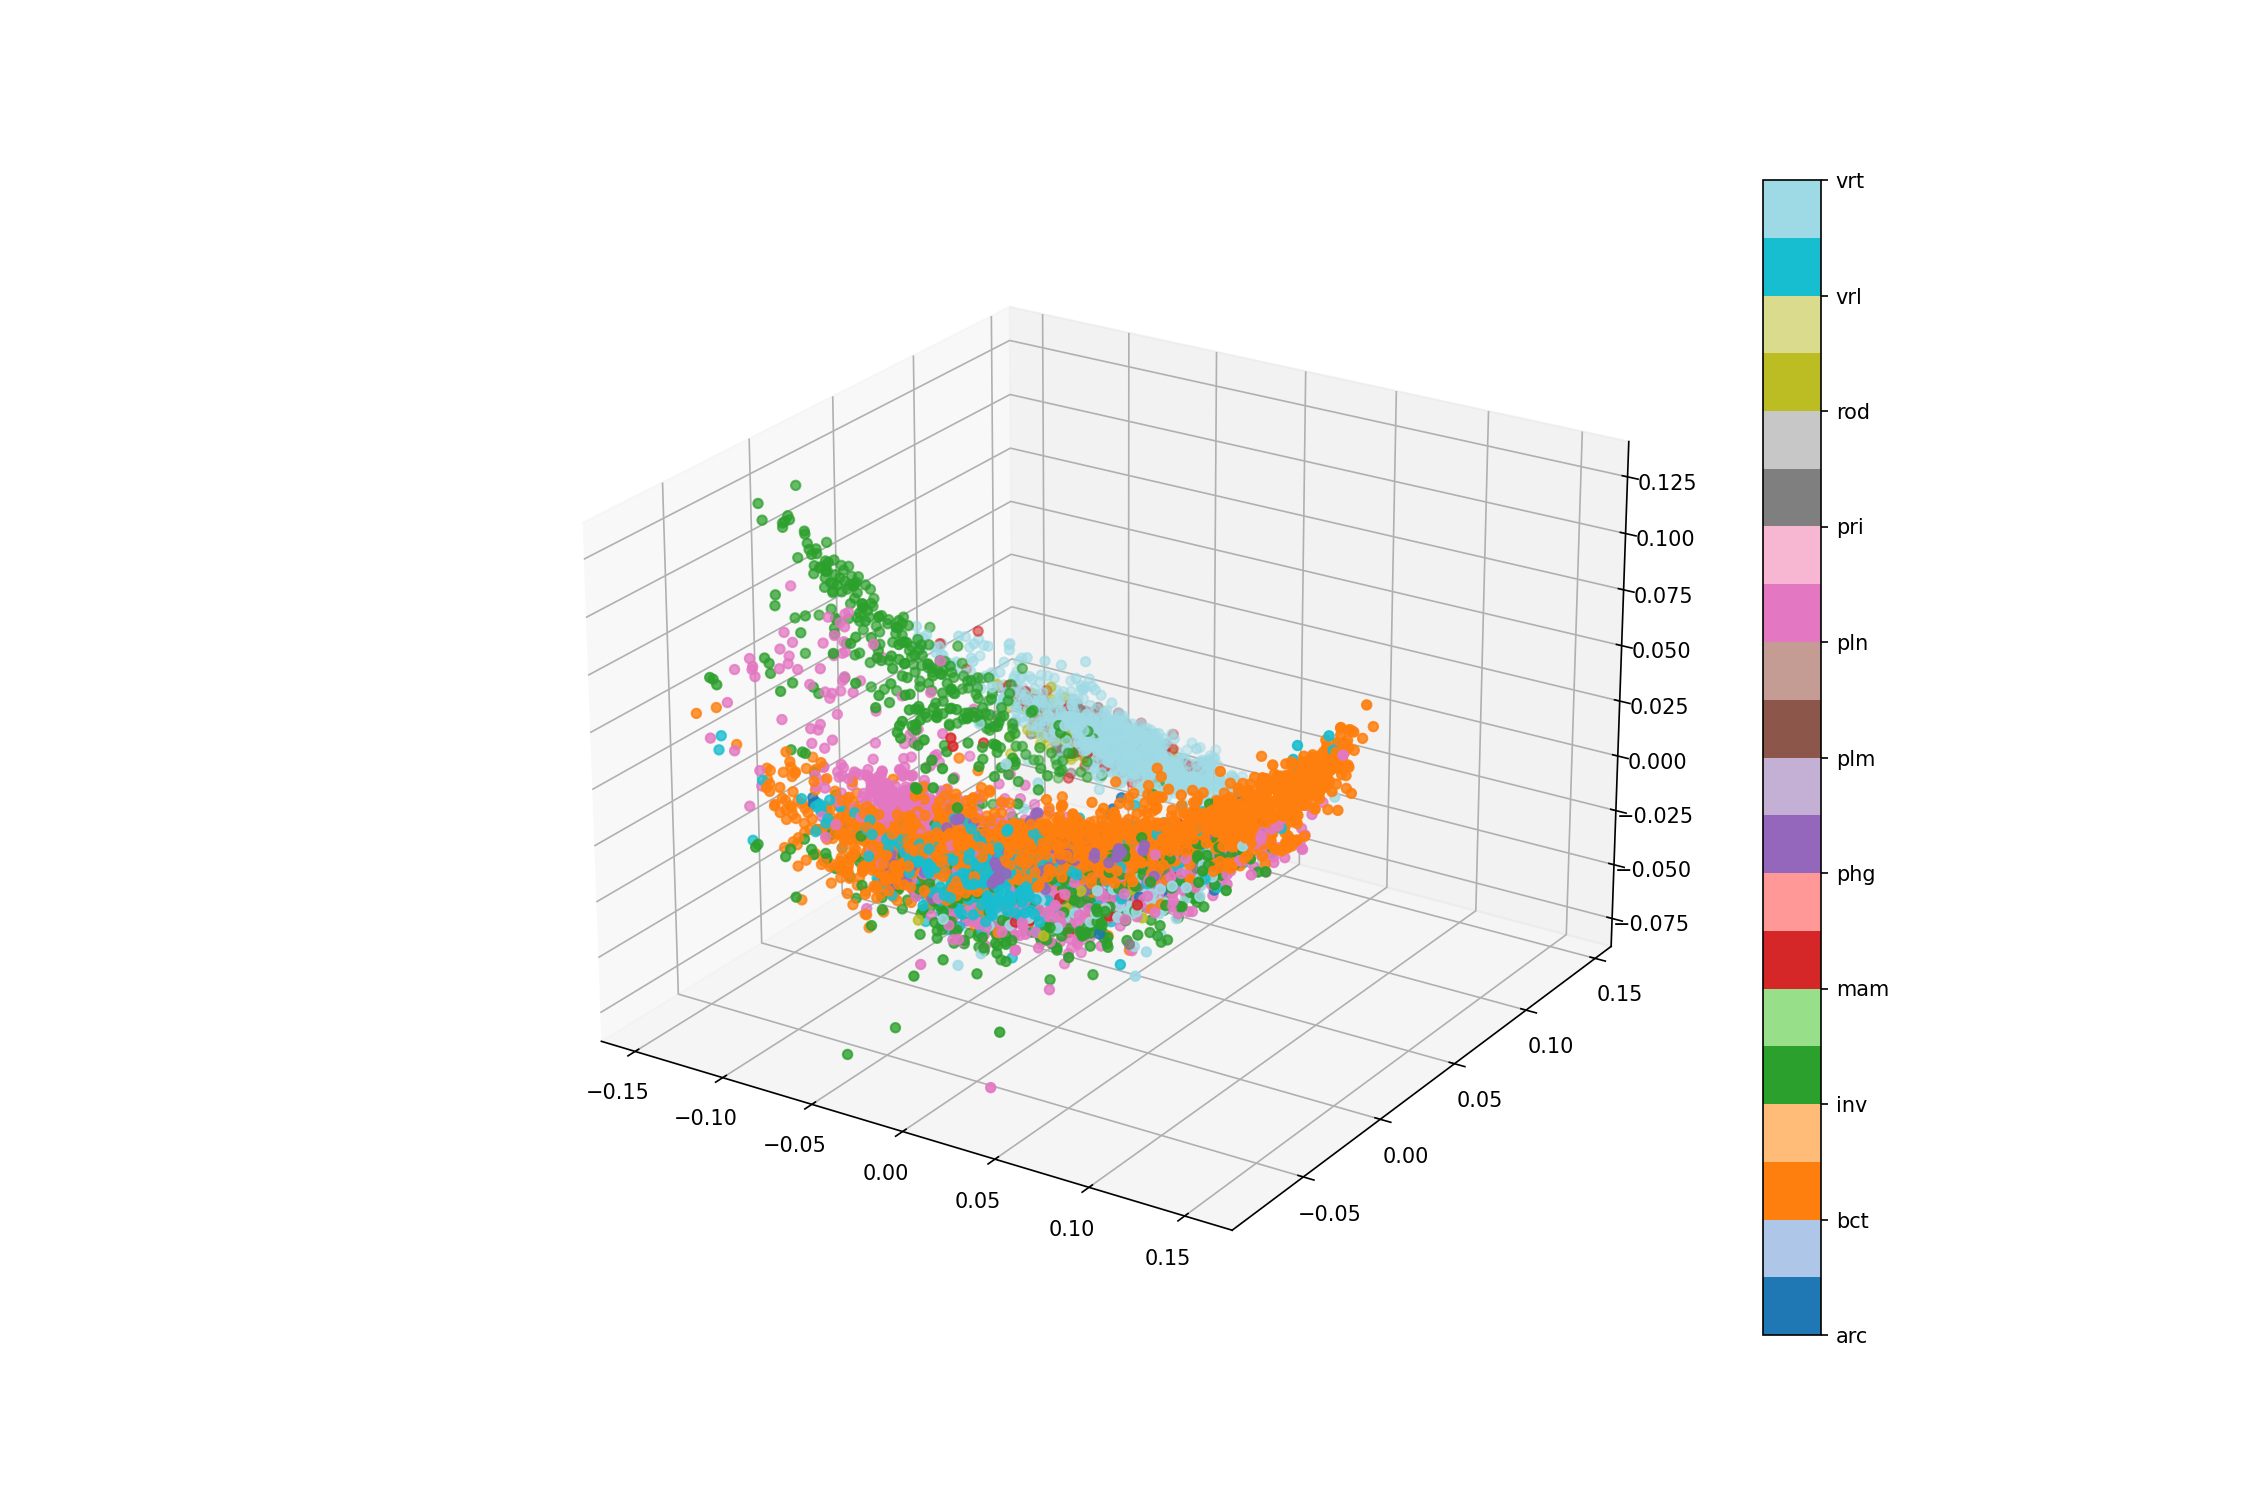

C:\Users\comin\AppData\Local\Temp\ipykernel_9612\3354104670.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA

def plot3d(X, labels):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    # Check the shape of X and labels before proceeding
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Number of labels: {len(labels)}")
    
    # Ensure X is reshaped correctly
    X = X.reshape(X.shape[0], -1)
    print(f"Shape of X after reshaping: {X.shape}")
    
    # Reduce features dimensionality for visualization purposes
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    print(f"Shape of X after PCA: {X.shape}")
    
    # Convert string labels to numeric labels
    unique_labels = np.unique(labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in labels])
    
    print(f"Unique labels: {unique_labels}")
    print(f"Numeric labels: {numeric_labels}")
    
    nlabels = len(unique_labels)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
           ('tab20' if nlabels <= 20 else
            'hsv'))
    cmap = plt.cm.get_cmap(col)
    
    # Plot the 3D coordinates
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=numeric_labels, cmap=cmap)
    
    # Plot a color bar on the right
    smap = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=numeric_labels.min(), vmax=numeric_labels.max()))
    cbar = plt.colorbar(mappable=smap, ax=ax, ticks=range(nlabels))
    cbar.ax.set_yticklabels(unique_labels)  # set string labels

    plt.show()

# Assuming 'training' is a DataFrame
# Drop "AGA" column and convert to numpy array
X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()

# Use a single column for labels (adjust as needed)
# Assuming the label column is "Label" (change to your actual label column name)
labels = training["Kingdom"]

print(f"Shape of X before passing to plot3d: {X.shape}")
print(f"Number of labels: {len(labels)}")

# Call the plot3d function
plot3d(X, labels)


Shape of X before passing to plot3d: (10422, 63)
Number of labels: 10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
Numeric labels: [9 2 1 ... 1 6 6]


<IPython.core.display.Javascript object>


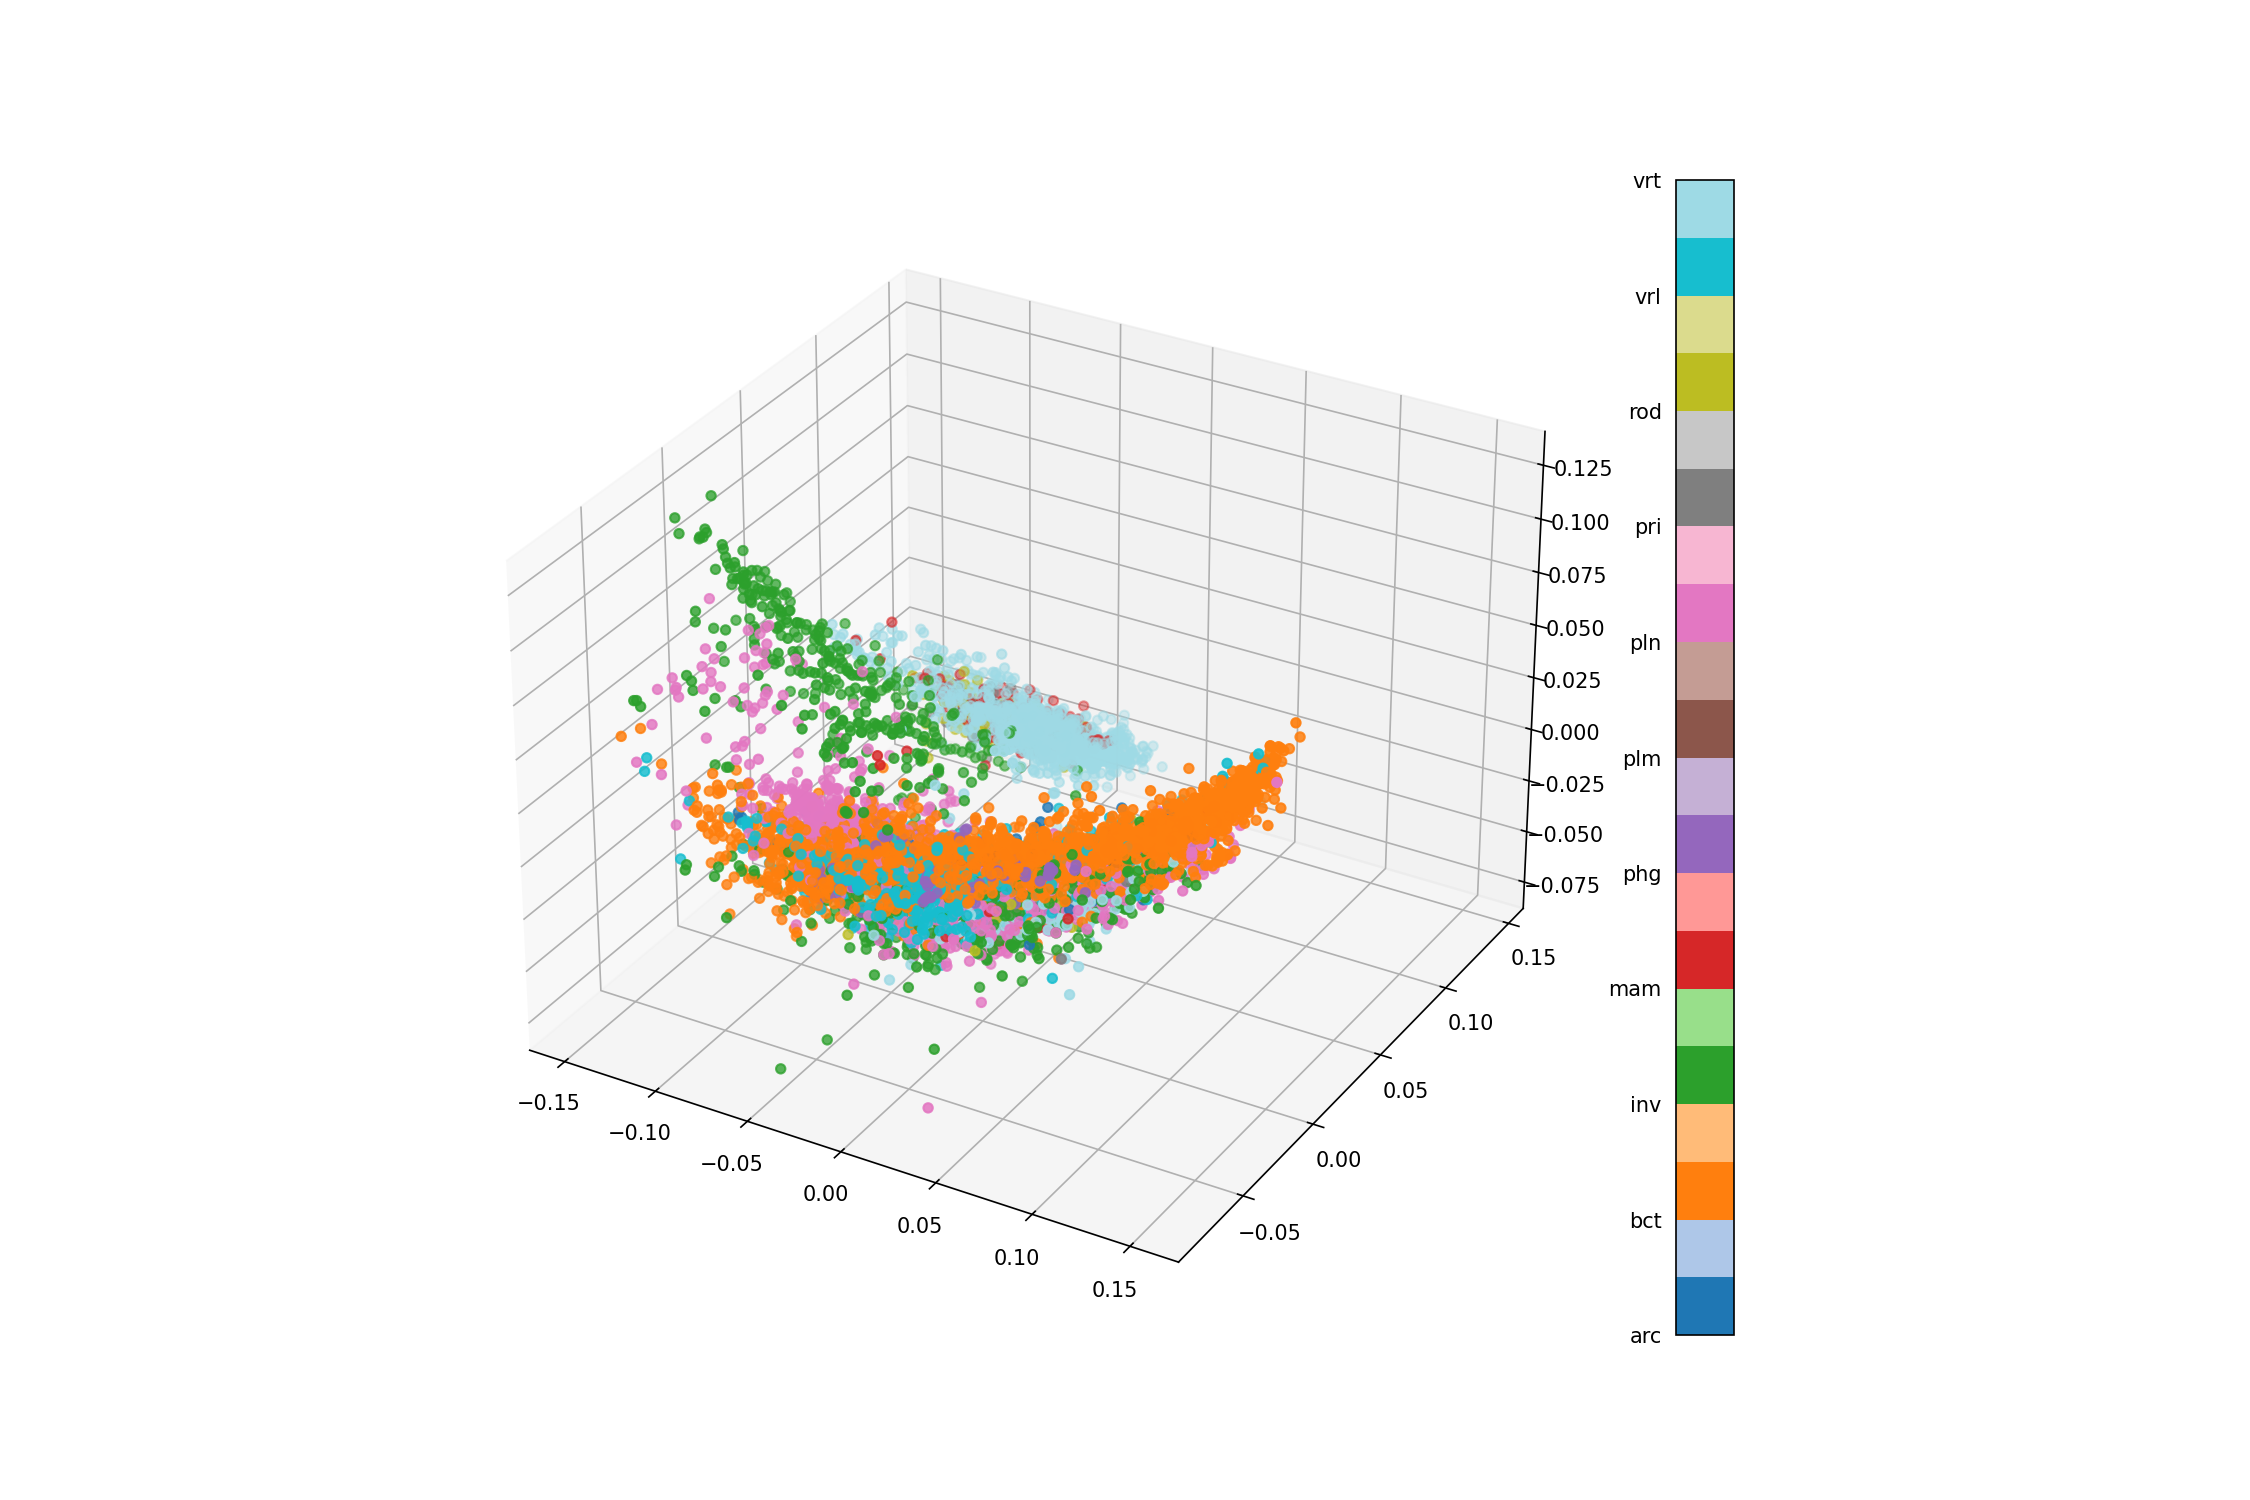

C:\Users\comin\AppData\Local\Temp\ipykernel_9612\806110916.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA

def plot3d(X, labels):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    # Check the shape of X and labels before proceeding
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Number of labels: {len(labels)}")
    
    # Ensure X is reshaped correctly
    X = X.reshape(X.shape[0], -1)
    print(f"Shape of X after reshaping: {X.shape}")
    
    # Reduce features dimensionality for visualization purposes
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    print(f"Shape of X after PCA: {X.shape}")
    
    # Convert string labels to numeric labels
    unique_labels = np.unique(labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in labels])
    
    print(f"Unique labels: {unique_labels}")
    print(f"Numeric labels: {numeric_labels}")
    
    nlabels = len(unique_labels)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
           ('tab20' if nlabels <= 20 else
            'hsv'))
    cmap = plt.cm.get_cmap(col)
    
    # Plot the 3D coordinates
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=numeric_labels, cmap=cmap)
    
    # Plot a color bar on the right
    smap = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=numeric_labels.min(), vmax=numeric_labels.max()))
    smap.set_array(numeric_labels)
    cbar = plt.colorbar(mappable=smap, ax=ax, ticks=range(nlabels))
    cbar.ax.set_yticklabels(unique_labels, ha='right')  # set string labels and align them to the right
    cbar.ax.yaxis.set_tick_params(width=0)  # Remove tick lines
    cbar.ax.yaxis.set_ticks_position('left')  # Put ticks on the left side of the color bar
    cbar.ax.yaxis.set_label_position('left')  # Put label on the left side of the color bar
    plt.subplots_adjust(left=0.15, right=0.85)  # Adjust position of color bar to make room for labels

    plt.show()

# Assuming 'training' is a DataFrame
# Drop "AGA" column and convert to numpy array
X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()

# Use a single column for labels (adjust as needed)
# Assuming the label column is "Label" (change to your actual label column name)
labels = training["Kingdom"]

print(f"Shape of X before passing to plot3d: {X.shape}")
print(f"Number of labels: {len(labels)}")

# Call the plot3d function
plot3d(X, labels)
